# 1. QR and least squares

In [8]:
using LinearAlgebra, Plots

m,n = 20,5
A = randn(m,n)
b = randn(m)
# want to find x that minimizes norm(A*x-b)
# inbuilt way: is use \
x = A \ b

5-element Vector{Float64}:
 -0.3004446270002751
 -0.014083016930344045
  0.2227741388330604
 -0.7972148832422374
 -0.15035578725079685

In [21]:
Q,R̂ = qr(A)
Q̂ = Q[:,1:n]
Q̂*R̂ ≈ A

true

In [22]:
R̂

5×5 Matrix{Float64}:
 5.26389  -0.513364  -1.52818   -1.95431   0.907681
 0.0       5.25654   -0.475475  -0.721602  0.774718
 0.0       0.0        4.4463     0.909929  0.879141
 0.0       0.0        0.0       -3.57665   1.08843
 0.0       0.0        0.0        0.0       3.36431

In [26]:
R̂ \ (Q̂'b) ≈ x

true

In [28]:
norm(A*x - b)

4.2648620991424

In [30]:
norm(A*(x .+ 0.001randn.()) - b)

4.26489476197898

# 2. Quadratic fit

Approximate data by
$$
p(x) = p_0 + p_1 x + p_2 x^2
$$

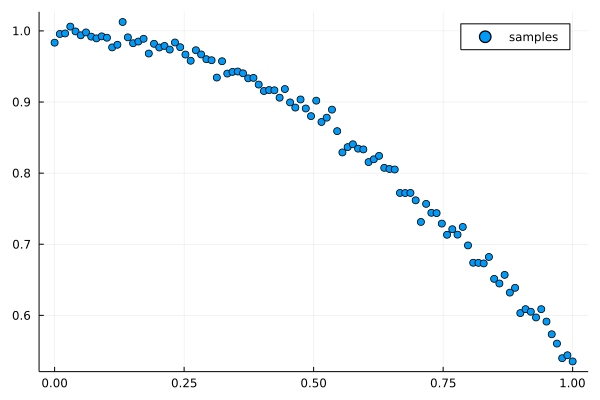

In [37]:
m,n = 100,3
x = range(0,1; length=100) # 100 evenly spaced points between 0 and 1, inclusive
f = cos.(x) .+ 0.01 .* randn.()

scatter(x, f; label="samples")

In [43]:
# p.(x) == [ones(m) x x.^2] * [p₀,p₁,p₂] == x .^ (0:2)' * [p₀,p₁,p₂]

A = x  .^ (0:2)'
p₀,p₁,p₂ = A \ f
p = x -> p₀ + p₁*x + p₂*x^2
scatter(x, f; label="samples")
plot!(x, p.(x); la)

3-element Vector{Float64}:
  0.9978074165198638
 -0.0032545430550723216
 -0.4642443749241754